In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [2]:
from PIL import Image, ImageDraw

In [3]:
def circle(radius):
    # init vars
    switch = 3 - (2 * radius)
    points = []
    x = 0
    y = radius
    # first quarter/octant starts clockwise at 12 o'clock
    while x <= y:
        # first quarter first octant
        points.append([x,-y])
        # first quarter 2nd octant
        points.append([y,-x])
        # second quarter 3rd octant
        points.append([y,x])
        # second quarter 4.octant
        points.append([x,y])
        # third quarter 5.octant
        points.append([-x,y])        
        # third quarter 6.octant
        points.append([-y,x])
        # fourth quarter 7.octant
        points.append([-y,-x])
        # fourth quarter 8.octant
        points.append([-x,-y])
        if switch < 0:
            switch = switch + (4 * x) + 6
        else:
            switch = switch + (4 * (x - y)) + 10
            y = y - 1
        x = x + 1
    return points

def circle(radius, img_array):
    # init vars
    radius-1
    switch = 3 - (2 * radius)
    points = []
    x = 0
    y = radius
    # first quarter/octant starts clockwise at 12 o'clock
    while x <= y:
        # first quarter first octant
        points.append((img_array[x,-y]+img_array[x+1,-y-1])//2)
        # first quarter 2nd octant
        points.append((img_array[y,-x]+img_array[y+1,-x-1])//2)
        # second quarter 3rd octant
        points.append((img_array[y,x]+img_array[y+1,x+1])//2)
        # second quarter 4.octant
        points.append((img_array[x,y]+img_array[x+1,y+1])//2)
        # third quarter 5.octant
        points.append((img_array[-x,y]+img_array[-x-1,y+1])//2)
        # third quarter 6.octant
        points.append((img_array[-y,x]+img_array[-y-1,x+1])//2)
        # fourth quarter 7.octant
        points.append((img_array[-y,-x]+img_array[-y-1,-x-1])//2)
        # fourth quarter 8.octant
        points.append((img_array[-x,-y]+img_array[-x-1,-y-1])//2)
        if switch < 0:
            switch = switch + (4 * x) + 6
        else:
            switch = switch + (4 * (x - y)) + 10
            y = y - 1
        x = x + 1
    return points

In [4]:
lena = Image.open(r'data/lena.png')
image = lena.resize((256, 256), Image.LANCZOS)

gray_image = image.convert('L')

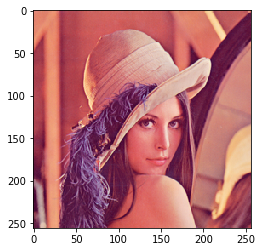

In [5]:
lena_array = np.asarray(image)
gray_array = np.asarray(gray_image)
plt.imshow(lena_array)

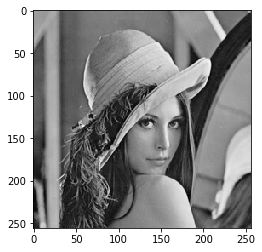

In [6]:
plt.imshow(gray_array, 'gray')

In [7]:
%%time
radius = len(gray_array)//2 #radius = image//2
p = []
for i in range(radius): 
    p.append(circle(i)) #画像の中心を(0,0)とした座標を得る

CPU times: user 36.3 ms, sys: 7.61 ms, total: 43.9 ms
Wall time: 25.8 ms


In [8]:
p #重複混じりの座標が入っている

[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]],
 [[0, -1], [1, 0], [1, 0], [0, 1], [0, 1], [-1, 0], [-1, 0], [0, -1]],
 [[0, -2],
  [2, 0],
  [2, 0],
  [0, 2],
  [0, 2],
  [-2, 0],
  [-2, 0],
  [0, -2],
  [1, -2],
  [2, -1],
  [2, 1],
  [1, 2],
  [-1, 2],
  [-2, 1],
  [-2, -1],
  [-1, -2]],
 [[0, -3],
  [3, 0],
  [3, 0],
  [0, 3],
  [0, 3],
  [-3, 0],
  [-3, 0],
  [0, -3],
  [1, -3],
  [3, -1],
  [3, 1],
  [1, 3],
  [-1, 3],
  [-3, 1],
  [-3, -1],
  [-1, -3],
  [2, -2],
  [2, -2],
  [2, 2],
  [2, 2],
  [-2, 2],
  [-2, 2],
  [-2, -2],
  [-2, -2]],
 [[0, -4],
  [4, 0],
  [4, 0],
  [0, 4],
  [0, 4],
  [-4, 0],
  [-4, 0],
  [0, -4],
  [1, -4],
  [4, -1],
  [4, 1],
  [1, 4],
  [-1, 4],
  [-4, 1],
  [-4, -1],
  [-1, -4],
  [2, -3],
  [3, -2],
  [3, 2],
  [2, 3],
  [-2, 3],
  [-3, 2],
  [-3, -2],
  [-2, -3],
  [3, -3],
  [3, -3],
  [3, 3],
  [3, 3],
  [-3, 3],
  [-3, 3],
  [-3, -3],
  [-3, -3]],
 [[0, -5],
  [5, 0],
  [5, 0],
  [0, 5],
  [0, 5],
  [-5, 0],
  [-5, 0],
  [0, 

In [9]:
%%time
coords = []
for i in range(len(p)):
    coords.append(np.asarray(list(map(list, set(map(tuple, p[i])))))+128) #重複を消して座標を左上を(0,0)に合わせる

CPU times: user 43.4 ms, sys: 1.04 ms, total: 44.5 ms
Wall time: 44.3 ms


In [10]:
coords

[array([[128, 128]]), array([[128, 129],
        [128, 127],
        [129, 128],
        [127, 128]]), array([[129, 130],
        [126, 129],
        [126, 128],
        [127, 126],
        [130, 127],
        [127, 130],
        [130, 129],
        [130, 128],
        [126, 127],
        [128, 126],
        [129, 126],
        [128, 130]]), array([[129, 131],
        [131, 128],
        [127, 131],
        [125, 127],
        [131, 129],
        [130, 126],
        [126, 130],
        [125, 128],
        [131, 127],
        [127, 125],
        [125, 129],
        [126, 126],
        [130, 130],
        [129, 125],
        [128, 131],
        [128, 125]]), array([[125, 126],
        [126, 125],
        [131, 125],
        [125, 131],
        [132, 127],
        [132, 128],
        [130, 125],
        [131, 131],
        [125, 125],
        [125, 130],
        [128, 132],
        [132, 129],
        [128, 124],
        [131, 130],
        [129, 132],
        [130, 131],
        [129, 12

In [11]:
%%time
a = []
for i in tqdm(range(len(coords))):
    temp = []
    pad_width = (0, len(max(coords, key=len))-len(coords[i]))
    for j in range(len(coords[i])):
        x, y = zip(coords[i][j])
        temp.append(gray_array[x,y])
    a.append(np.pad([flatten for inner in temp for flatten in inner], pad_width, 'constant', constant_values=0))

100%|██████████| 128/128 [00:00<00:00, 333.78it/s]

CPU times: user 369 ms, sys: 10.6 ms, total: 380 ms
Wall time: 388 ms


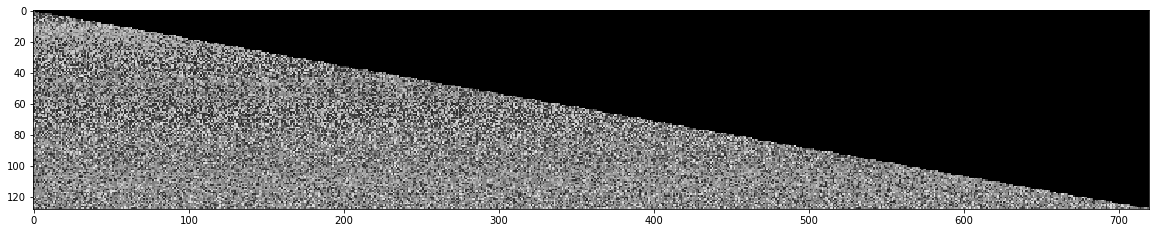

In [12]:
plt.figure(figsize=(20, 20))
plt.imshow(np.asarray(a), 'gray')
#plt.savefig( 'pre_chash.png' )

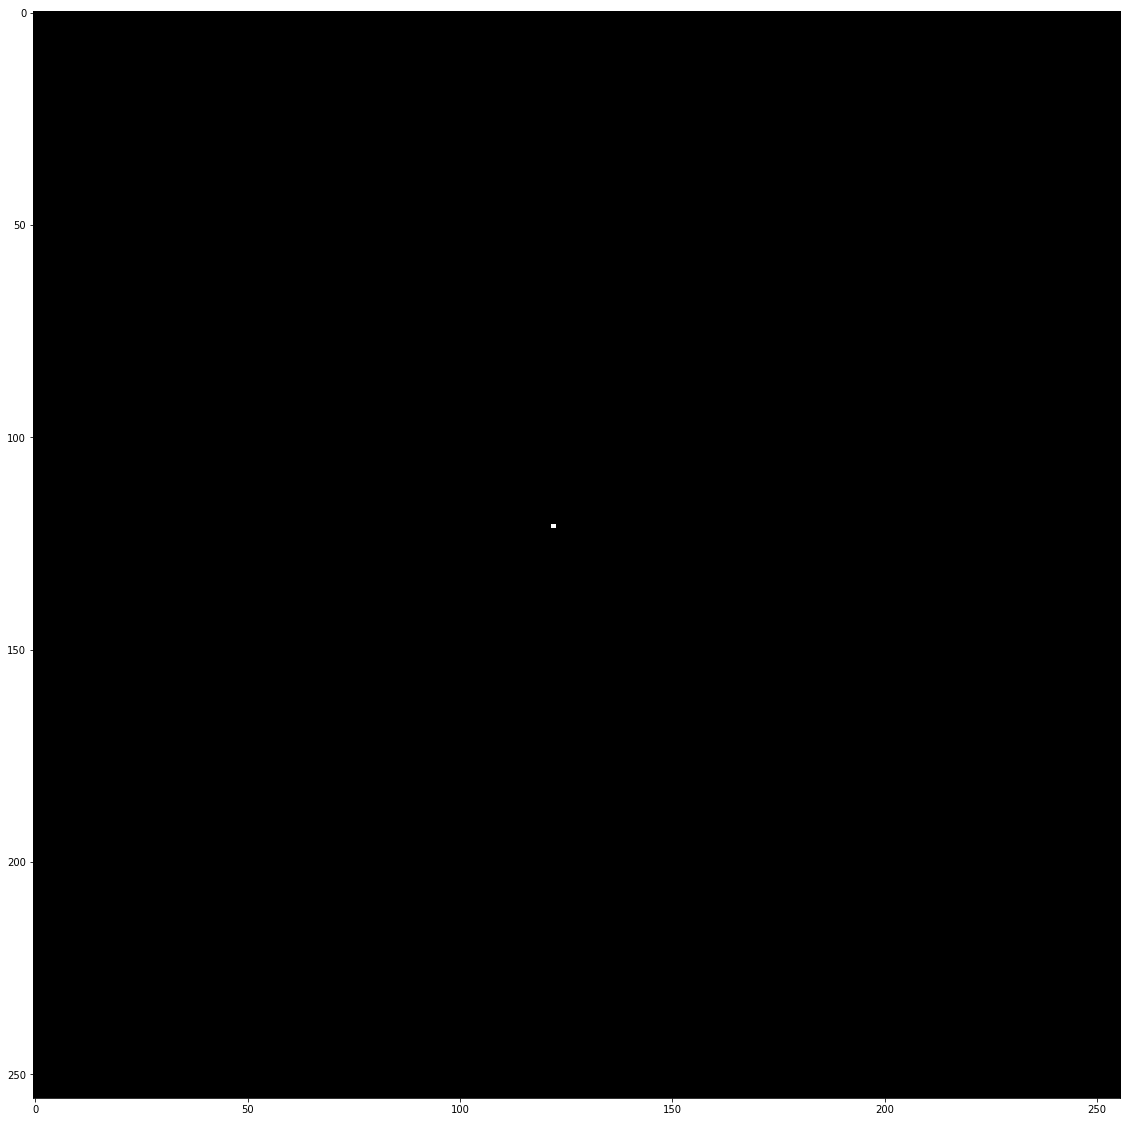

In [17]:
plt.figure(figsize=(20, 20))
size=max(image.size)
circle_graph = Image.new("RGB", (size, size), (0,0,0))
draw = ImageDraw.Draw(circle_graph)

for i in range(10):
    for point in p[i]:
        draw.point((size/2+point[0],size/2+point[1]),(255,255,255))
plt.imshow(circle_graph)
#plt.savefig( 'Bresenham_solid_circle' )